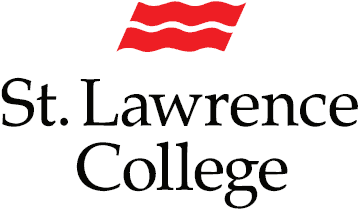

### ADMN5016: Applied Artificial Intelligence and Machine Learning<br><br>Maria Isabel Dio Grau || Final Project

## Project Background

**Dataset Description**: This dataset includes account and activity information from over 3,000 customers of Orange Telecom, including state, area code, mobile plan, total day calls, etc. The target variable is whether or not these customers churned or terminated their telecom subscription.

**Machine Learning Algorithm**: K Nearest Neighbors, Logistic Regression, Support Vector Machine, Decision Trees, Random Forest

**Business Case**: Mobile company ADMN has built a wide customer base over the past few years and now has enough data to analyze in order to maintain good relationships with its customers since it costs less to retain an existing customer than to acquire a new customer. Using classification algorithms, this project aims to predict whether a customer will churn. If a customer is predicted as likely to churn, the company can take corrective actions to improve its services, such as increasing customer support staff or offering mobile plan promotions. This will also make the company more competitive against other mobile plan providers because of its proactive approach to providing quality service.

***

## Table of Contents

<a href='#overview'>Data Overview</a><br>
<a href='#preparation'>Data and Model Preparation</a><br>
<a href='#knn'>K Nearest Neighbors</a><br>
<a href='#lr'>Logistic Regression</a><br>
<a href='#svm'>Support Vector Machine</a><br>
<a href='#tree'>Decision Tree</a><br>
<a href='#bag'>Decision Tree with Bagging</a><br>
<a href='#forest'>Random Forest</a><br>
<a href='#comparison'>Model Comparison</a>

In [1]:
# Run if kernel keeps crashing

import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [2]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support, recall_score, accuracy_score
from tqdm import tqdm
sns.set(style="whitegrid", color_codes=True)
import itertools
%matplotlib inline  
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

<a id='overview'></a>

## Data Overview

In [3]:
# Get dataset
churn_df = pd.read_csv("https://raw.githubusercontent.com/isabelgrau/ADMN5016/4b2bf4fca9bee85bf727144792bd2b530d89a5e3/telecom-churn.csv")

In [4]:
# View first 5 rows
churn_df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [5]:
# Recode variables
churn_df['Churn'] = churn_df['Churn'].astype('int')
churn_df[["International plan", "Voice mail plan"]] = (churn_df[["International plan", "Voice mail plan"]] == "Yes").astype('int')
churn_df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [6]:
churn_df.shape

(3333, 20)

There are 3,333 customers and 20 dimensions in the dataset.

In [7]:
# Get dimension information
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   int32  
 4   Voice mail plan         3333 non-null   int32  
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

In [8]:
# Check for null values
churn_df.isnull().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

There are no null values in the dataset.

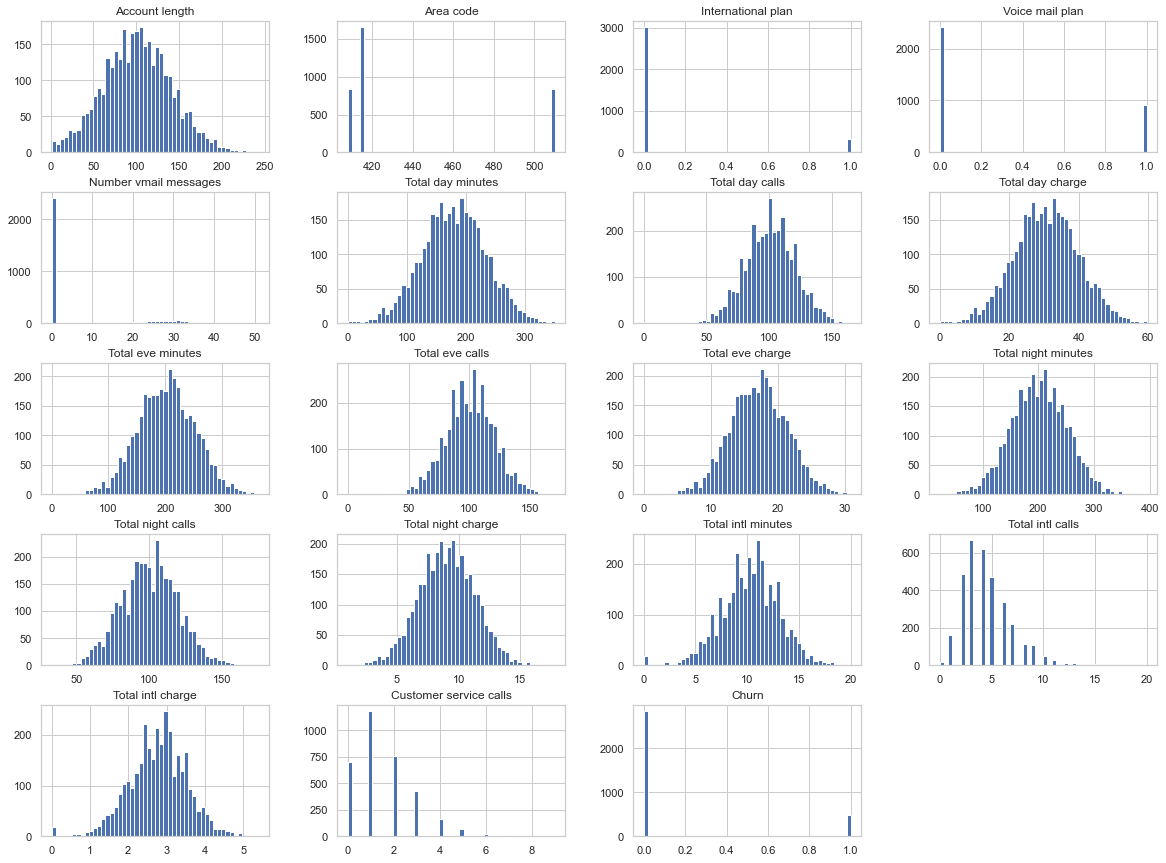

In [9]:
# Visualize data
churn_df.hist(bins=50, figsize=(20,15))
plt.show()

The histograms show that most dimensions are normally distributed except for number of vmail messages, total international calls, and customer service calls. Because these dimensions are skewed, they will not be included in the analysis. State, account length, and area code will also be excluded as these are categorical variables (the dataset does not define "account length", so this analysis assumes it is an identifier).

International plan and voice mail plan are boolean dimensions and could influence whether or not a customer churns, so they will remain part of the analysis.

In [10]:
# Drop variables
churn_df = churn_df.drop(["State",
                          "Account length",
                          "Area code",
                          "Number vmail messages",
                          "Total intl calls",
                          "Customer service calls"], axis = 1)
churn_df.head()

,International plan,Voice mail plan,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl charge,Churn
0,0,1,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,2.70,0
1,0,1,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3.70,0
2,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,3.29,0
3,1,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,1.78,0
4,1,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,2.73,0


In [11]:
# Get summary statistics for numerical variables
churn_df.iloc[:,2:13].describe()

,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl charge
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,2.764581
std,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,0.753773
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000
25%,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,2.300000
50%,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,2.780000
75%,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,3.270000
max,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,5.400000


In [12]:
churn_df['Churn'].value_counts()

0    2850
1     483
Name: Churn, dtype: int64

In [13]:
churn_df['Churn'].sum() / len(churn_df['Churn'])

0.14491449144914492

14.5% of customers in the dataset churned, while 85.5% did not.

<AxesSubplot:>

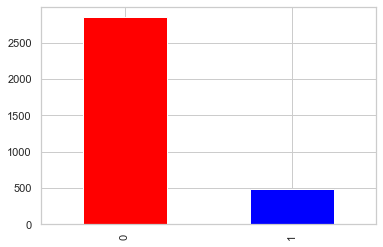

In [14]:
churn_df['Churn'].value_counts().plot.bar(color=['red','blue'])

<a id='preparation'></a>

## Data and Model Preparation

In [15]:
X = churn_df.drop(["Churn"], axis = 1)
y = churn_df['Churn']

In [16]:
X.head()

,International plan,Voice mail plan,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl charge
0,0,1,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,2.70
1,0,1,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3.70
2,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,3.29
3,1,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,1.78
4,1,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,2.73


In [17]:
# Normalize data
def Norm(x):
    return((x-x.mean())/x.std())

In [18]:
X_norm = X.iloc[:,2:].apply(Norm)
X_norm.head()

,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl charge
0,1.566532,0.476572,1.566801,-0.070599,-0.055932,-0.070416,0.866613,-0.465425,0.865899,-0.084995,-0.085678
1,-0.333688,1.124334,-0.333963,-0.108064,0.144845,-0.107533,1.058412,0.147802,1.059231,1.240296,1.240982
2,1.168128,0.675883,1.168289,-1.573147,0.496204,-1.573664,-0.756756,0.198905,-0.755457,0.703015,0.697052
3,2.196267,-1.466716,2.196429,-2.742453,-0.608068,-2.742856,-0.078539,-0.567629,-0.078794,-1.302831,-1.306205
4,-0.240054,0.626055,-0.240005,-1.038776,1.098534,-1.037784,-0.276270,1.067643,-0.276520,-0.049177,-0.045878


In [19]:
X = pd.merge(X.iloc[:,0:2], X_norm, left_index=True, right_index=True)

In [20]:
X.head()

,International plan,Voice mail plan,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl charge
0,0,1,1.566532,0.476572,1.566801,-0.070599,-0.055932,-0.070416,0.866613,-0.465425,0.865899,-0.084995,-0.085678
1,0,1,-0.333688,1.124334,-0.333963,-0.108064,0.144845,-0.107533,1.058412,0.147802,1.059231,1.240296,1.240982
2,0,0,1.168128,0.675883,1.168289,-1.573147,0.496204,-1.573664,-0.756756,0.198905,-0.755457,0.703015,0.697052
3,1,0,2.196267,-1.466716,2.196429,-2.742453,-0.608068,-2.742856,-0.078539,-0.567629,-0.078794,-1.302831,-1.306205
4,1,0,-0.240054,0.626055,-0.240005,-1.038776,1.098534,-1.037784,-0.276270,1.067643,-0.276520,-0.049177,-0.045878


In [21]:
# Confusion matrix function
target_names = ['not churn', 'churn']

def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    print(cm)

    thresh = 3*cm.max()/4
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [22]:
# Metrics
def pretty_metrics(precision_recall_fscore=0,accuracy_score=0):
    if precision_recall_fscore==0:
        metric_dict={'accuracy':[],'precision':[],'recall':[],'F1':[]}
        return metric_dict
    
    #This function prints out the precision, recall,f-score and accuracy is also saves the result to a dictionary 
    metric_dict={'accuracy':[],'precision':[],'recall':[],'F1':[]}
    metric_dict['accuracy']=accuracy_score
    metric_dict['precision']=precision_recall_fscore[0][1]
    metric_dict['recall']=precision_recall_fscore[1][1]
    metric_dict['F1']=precision_recall_fscore[2][1]
    [print(key,value) for key, value in metric_dict.items()]
    return metric_dict

In [23]:
# Partition dataset into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)
print('Training data size:',X_train.shape[0])
print('Testing data size:',X_test.shape[0])

Training data size: 2666
Testing data size: 667


<a id='knn'></a>

## K Nearest Neighbors

In [24]:
# Try K from 1 to 25
max_k = 25

# Create an empty list accuracy
accuracy = []

In [25]:
for k in range(1, max_k + 1):
    # Create a KNN classifier
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Train the classifier
    knn = knn.fit(X_train, y_train)
    yhat = knn.predict(X_test)
    
    # Evaluate the classifier with accuracy  
    accuracy.append(np.mean(yhat==y_test))

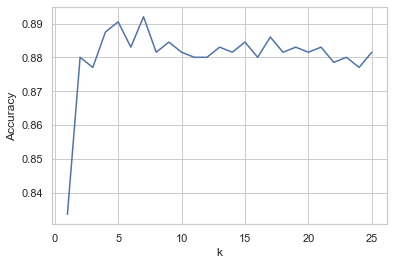

In [26]:
plt.plot([n+1 for n in range(len(accuracy))],accuracy)
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.show()

In [27]:
accuracy

[0.8335832083958021,
 0.8800599700149925,
 0.8770614692653673,
 0.8875562218890555,
 0.8905547226386806,
 0.8830584707646177,
 0.8920539730134932,
 0.881559220389805,
 0.8845577211394303,
 0.881559220389805,
 0.8800599700149925,
 0.8800599700149925,
 0.8830584707646177,
 0.881559220389805,
 0.8845577211394303,
 0.8800599700149925,
 0.8860569715142429,
 0.881559220389805,
 0.8830584707646177,
 0.881559220389805,
 0.8830584707646177,
 0.8785607196401799,
 0.8800599700149925,
 0.8770614692653673,
 0.881559220389805]

In [28]:
max(accuracy)

0.8920539730134932

In [29]:
accuracy.index(max(accuracy)) + 1

7

Maximum accuracy is 89.2% when k=7.

In [30]:
# Rerun knn and set k=7
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
knn_yhat = knn.predict(X_test)

In [31]:
# Check if accuracy matches
acc = np.mean(knn_yhat==y_test)
acc

0.8920539730134932

[[569  67]
 [  5  26]]


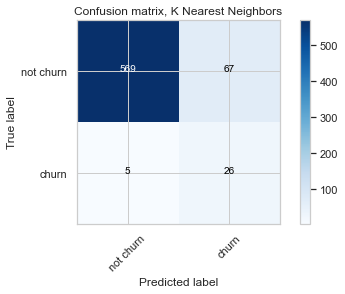

In [32]:
knn_cm = plot_confusion_matrix(confusion_matrix(knn_yhat,y_test), classes=target_names, title='Confusion matrix, K Nearest Neighbors')

In [33]:
prf1 = precision_recall_fscore_support(y_test,knn_yhat)
knn_metrics = pretty_metrics(precision_recall_fscore=prf1,accuracy_score=acc)

accuracy 0.8920539730134932
precision 0.8387096774193549
recall 0.27956989247311825
F1 0.41935483870967744


<a id='lr'></a>

## Logistic Regression

In [34]:
C = [0.001, 0.01, 0.1, 1]

# Create an empty list accuracy
accuracy = []

for cval in C:
    LR = LogisticRegression(C=cval)
    LR.fit(X_train,y_train)
    yhat=LR.predict(X_test)

    # Evaluate the classifier with accuracy  
    accuracy.append(np.mean(yhat==y_test))

In [35]:
accuracy

[0.8605697151424287, 0.8620689655172413, 0.8725637181409296, 0.863568215892054]

In [36]:
max(accuracy)

0.8725637181409296

In [37]:
C[accuracy.index(max(accuracy))]

0.1

Maximum accuracy is 87.3% when C=0.1.

In [38]:
# Rerun LR and set C=0.1
LR = LogisticRegression(C=0.1)
LR.fit(X_train,y_train)
LR_yhat=LR.predict(X_test)

In [39]:
# Check if accuracy matches
acc = np.mean(LR_yhat==y_test)
acc

0.8725637181409296

[[572  83]
 [  2  10]]


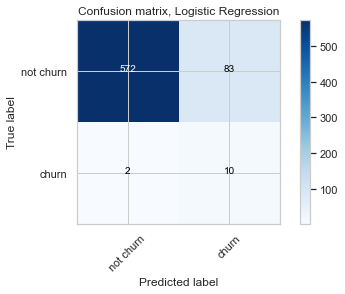

In [40]:
lr_cm = plot_confusion_matrix(confusion_matrix(LR_yhat,y_test), classes=target_names,title='Confusion matrix, Logistic Regression')

In [41]:
prf1 = precision_recall_fscore_support(y_test,LR_yhat)
LR_metrics = pretty_metrics(precision_recall_fscore=prf1,accuracy_score=acc)

accuracy 0.8725637181409296
precision 0.8333333333333334
recall 0.10752688172043011
F1 0.19047619047619047


<a id='svm'></a>

## Support Vector Machine

In [42]:
# SVM Grid Search
SVM = GridSearchCV(SVC(), {
    'C': [0.01,0.1 ,1, 10],
    'kernel': ['rbf', 'linear']
}, cv = 5)

In [43]:
SVM.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1, 10], 'kernel': ['rbf', 'linear']})

In [44]:
SVM.best_params_

{'C': 10, 'kernel': 'rbf'}

SVM is optimized when C=10 and kernel=rbf.

In [45]:
# Rerun SVM and set C=10, kernel=rbf
SVM=SVC(C=10, kernel='rbf',cache_size=600)
SVM.fit(X_train,y_train)
SVM_yhat=SVM.predict(X_test)

In [46]:
acc = np.mean(SVM_yhat==y_test)
acc

0.9115442278860569

[[564  49]
 [ 10  44]]


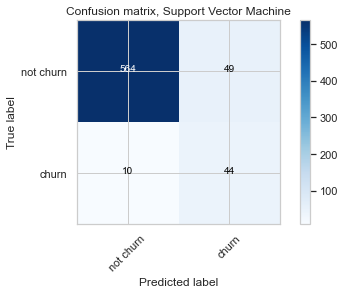

In [47]:
svm_cm = plot_confusion_matrix(confusion_matrix(SVM_yhat,y_test), classes=target_names,title='Confusion matrix, Support Vector Machine')

In [48]:
prf1 = precision_recall_fscore_support(y_test,SVM_yhat)
SVM_metrics = pretty_metrics(precision_recall_fscore=prf1,accuracy_score=acc)

accuracy 0.9115442278860569
precision 0.8148148148148148
recall 0.4731182795698925
F1 0.5986394557823128


<a id='tree'></a>

## Decision Tree

In [49]:
def get_accuracy(X_train, X_test, y_train, y_test, model):
    return  {"test Accuracy":accuracy_score(y_test, model.predict(X_test)),"train Accuracy": accuracy_score(y_train, model.predict(X_train))}

In [50]:
max_depth=5
Tree = DecisionTreeClassifier(criterion="entropy", max_depth = max_depth,random_state=10)
Tree.fit(X_train,y_train)
Tree_yhat = Tree.predict(X_test)

In [51]:
get_accuracy(X_train, X_test, y_train, y_test,  Tree)

{'test Accuracy': 0.9085457271364318, 'train Accuracy': 0.9122280570142536}

[[568  55]
 [  6  38]]


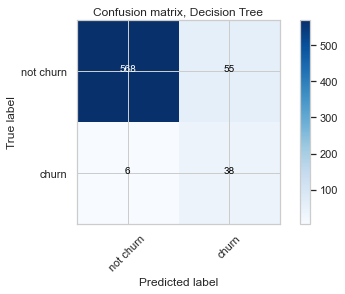

In [52]:
dt_cm = plot_confusion_matrix(confusion_matrix(Tree_yhat,y_test), classes=target_names,title='Confusion matrix, Decision Tree')

In [53]:
prf1 = precision_recall_fscore_support(y_test,Tree_yhat)
Tree_metrics = pretty_metrics(precision_recall_fscore=prf1,accuracy_score=accuracy_score(y_test, Tree_yhat))

accuracy 0.9085457271364318
precision 0.8636363636363636
recall 0.40860215053763443
F1 0.5547445255474452


<a id='bag'></a>

## Decision Tree with Bagging

In [54]:
def get_accuracy_bag(X,y,title,times=20,xlabel='Number Estimators'):
    #Iterate through different number of estimators and average out the results  
    N_estimators=[n for n in range(1,70)]
    times=20
    train_acc=np.zeros((times,len(N_estimators)))
    test_acc=np.zeros((times,len(N_estimators)))
    
    train_time=np.zeros((times,len(N_estimators)))
    test_time=np.zeros((times,len(N_estimators)))

    # Average out the results
    for n in tqdm(range(times)):
        X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3)
        for n_estimators in N_estimators:
            #Iterate through different number of estimators and average out the results           
            Bag= BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion="entropy", max_depth = 5),n_estimators=n_estimators,bootstrap=True,random_state=0)
            Bag.fit(X_train,y_train)
            Accuracy=get_accuracy(X_train, X_test, y_train, y_test,  Bag)
            train_acc[n,n_estimators-1]=Accuracy['train Accuracy']
            test_acc[n,n_estimators-1]=Accuracy['test Accuracy']
    fig, ax1 = plt.subplots()

    ax2 = ax1.twinx()
    ax1.plot(train_acc.mean(axis=0))
    ax2.plot(test_acc.mean(axis=0),c='r')
    ax1.set_xlabel(xlabel)
    ax1.set_ylabel('Training accuracy',color='b')
    ax2.set_ylabel('Testing accuracy', color='r')
    plt.title(title)
    plt.show()   

In [55]:
Bag = BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion="entropy", max_depth = 5,random_state=2),n_estimators=30,random_state=0,bootstrap=True)
Bag.fit(X_train,y_train)
Bag_yhat = Bag.predict(X_test)

In [56]:
print(get_accuracy(X_train, X_test, y_train, y_test,  Bag))

{'test Accuracy': 0.9160419790104948, 'train Accuracy': 0.9204801200300075}


[[572  54]
 [  2  39]]


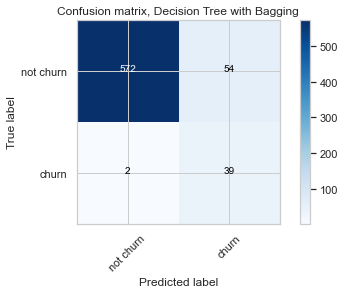

In [57]:
bag_cm = plot_confusion_matrix(confusion_matrix(Bag_yhat,y_test), classes=target_names,title='Confusion matrix, Decision Tree with Bagging')

In [58]:
prf1 = precision_recall_fscore_support(y_test,Bag_yhat)
Bag_metrics = pretty_metrics(precision_recall_fscore=prf1,accuracy_score=accuracy_score(y_test, Bag_yhat))

accuracy 0.9160419790104948
precision 0.9512195121951219
recall 0.41935483870967744
F1 0.582089552238806


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [09:21<00:00, 28.06s/it]


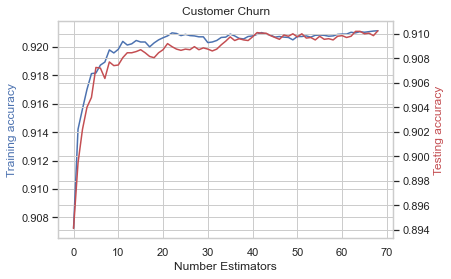

In [60]:
# 8-10 mins run time
get_accuracy_bag(X, y, "Customer Churn")

<a id='forest'></a>

## Random Forest

In [61]:
n_estimators=20 

In [62]:
M_features=X.shape[1]
max_features=round(np.sqrt(M_features))-1
max_features

3

In [63]:
forest = RandomForestClassifier(max_features=max_features,n_estimators=n_estimators, random_state=0)
forest.fit(X_train,y_train)
forest_yhat = forest.predict(X_test)

In [64]:
print(get_accuracy(X_train, X_test, y_train, y_test, forest)) 

{'test Accuracy': 0.9115442278860569, 'train Accuracy': 0.9928732183045762}


[[569  54]
 [  5  39]]


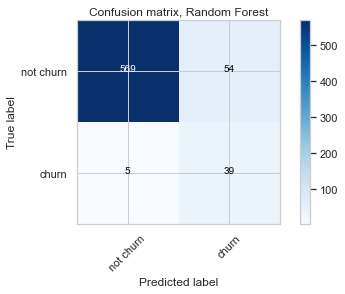

In [65]:
forest_cm = plot_confusion_matrix(confusion_matrix(forest_yhat,y_test), classes=target_names,title='Confusion matrix, Random Forest')

In [66]:
prf1 = precision_recall_fscore_support(y_test,forest_yhat)
forest_metrics = pretty_metrics(precision_recall_fscore=prf1,accuracy_score=accuracy_score(y_test, forest_yhat))

accuracy 0.9115442278860569
precision 0.8863636363636364
recall 0.41935483870967744
F1 0.5693430656934306


<a id='comparison'></a>

## Model Comparison

In [67]:
pd.DataFrame([knn_metrics, LR_metrics, SVM_metrics, Tree_metrics, Bag_metrics, forest_metrics],
             index=['KNN', 'Logistic Regression', 'SVM', 'Decision Tree', 'Decision Tree with Bagging', 'Random Forest'])

,accuracy,precision,recall,F1
KNN,0.892054,0.838710,0.279570,0.419355
Logistic Regression,0.872564,0.833333,0.107527,0.190476
SVM,0.911544,0.814815,0.473118,0.598639
Decision Tree,0.908546,0.863636,0.408602,0.554745
Decision Tree with Bagging,0.916042,0.951220,0.419355,0.582090
Random Forest,0.911544,0.886364,0.419355,0.569343


[[569  67]
 [  5  26]]


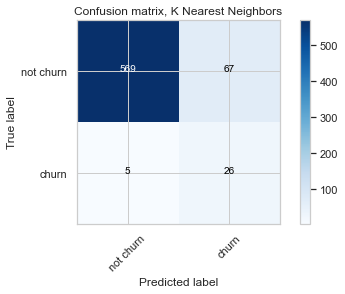

In [68]:
plot_confusion_matrix(confusion_matrix(knn_yhat,y_test), classes=target_names, title='Confusion matrix, K Nearest Neighbors')

[[572  83]
 [  2  10]]


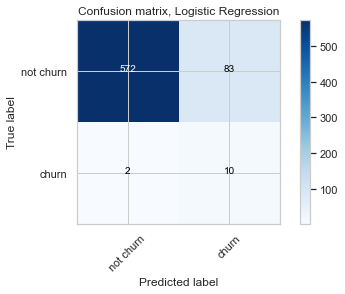

In [69]:
plot_confusion_matrix(confusion_matrix(LR_yhat,y_test), classes=target_names,title='Confusion matrix, Logistic Regression')

[[564  49]
 [ 10  44]]


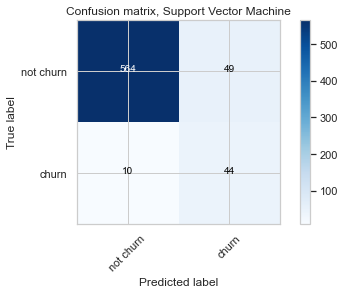

In [70]:
plot_confusion_matrix(confusion_matrix(SVM_yhat,y_test), classes=target_names,title='Confusion matrix, Support Vector Machine')

[[568  55]
 [  6  38]]


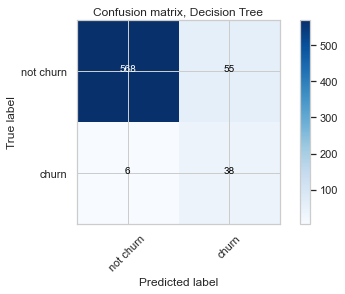

In [71]:
plot_confusion_matrix(confusion_matrix(Tree_yhat,y_test), classes=target_names,title='Confusion matrix, Decision Tree')

[[572  54]
 [  2  39]]


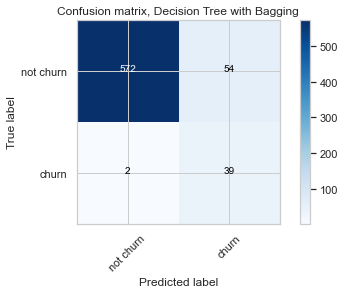

In [72]:
plot_confusion_matrix(confusion_matrix(Bag_yhat,y_test), classes=target_names,title='Confusion matrix, Decision Tree with Bagging')

[[569  54]
 [  5  39]]


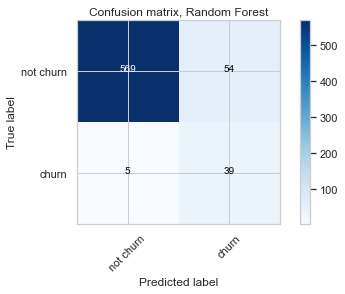

In [73]:
plot_confusion_matrix(confusion_matrix(forest_yhat,y_test), classes=target_names,title='Confusion matrix, Random Forest')